In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

ruta_archivo = '/content/prices-split-adjusted.csv'

# Carga el archivo CSV en un DataFrame
df_prices = pd.read_csv(ruta_archivo)

# Supongamos que tienes un DataFrame llamado df con columnas 'open' y 'close'
df_prices['accion'] = df_prices.apply(lambda row: 1 if row['open'] < row['close'] else 0, axis=1)

In [ ]:
df_prices

,date,symbol,open,close,low,high,volume,accion
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,1
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,1
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,0
...,...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0,0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0,0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0,0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0,1


In [ ]:
df_prices.symbol.value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [ ]:
#count_condition = (df_prices['symbol'] == 'WLTW').sum()

# Mostrar el resultado
#print(count_condition)

df_wltw = df_prices.loc[df_prices['symbol'] == 'KSU']
df_wltw

,date,symbol,open,close,low,high,volume,accion
500,2010-01-04,KSU,33.490002,33.650002,33.419998,33.869999,613500.0,1
968,2010-01-05,KSU,33.639999,34.310001,33.500000,34.439999,1129300.0,1
1436,2010-01-06,KSU,33.240002,32.049999,31.870001,33.590000,2627400.0,0
1904,2010-01-07,KSU,32.040001,32.410000,31.799999,32.799999,1076500.0,1
2372,2010-01-08,KSU,32.290001,33.860001,32.290001,34.020000,1005000.0,1
...,...,...,...,...,...,...,...,...
849029,2016-12-23,KSU,85.400002,85.290001,84.989998,85.930000,1376200.0,0
849529,2016-12-27,KSU,85.300003,86.160004,85.230003,86.379997,667000.0,1
850029,2016-12-28,KSU,85.870003,84.529999,84.419998,86.599998,805600.0,0
850529,2016-12-29,KSU,84.839996,84.459999,84.190002,85.089996,617600.0,0


Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.519


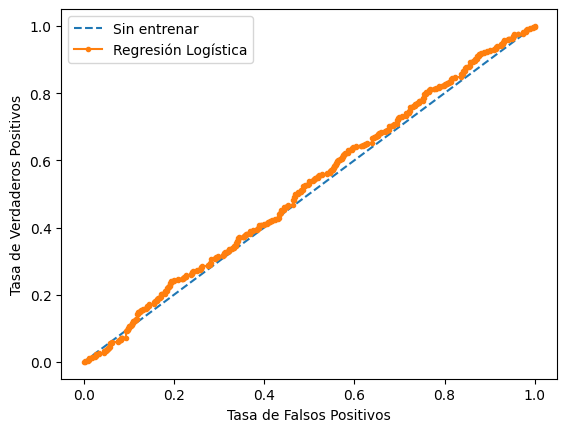

In [ ]:
#Importamos
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Descargar los datos
y = df_wltw['accion']  # Columna de clasificación
X = df_wltw.drop(['accion', 'date', 'symbol'], axis=1)  # Resto de columnas

#X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# Dividimos en training y test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(testy))]

# Entrenamos nuestro modelo de reg log
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)

#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]

# Calculamos el AUC
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))

# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')

# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

Regresión Logística: f1=0.000 auc=0.542


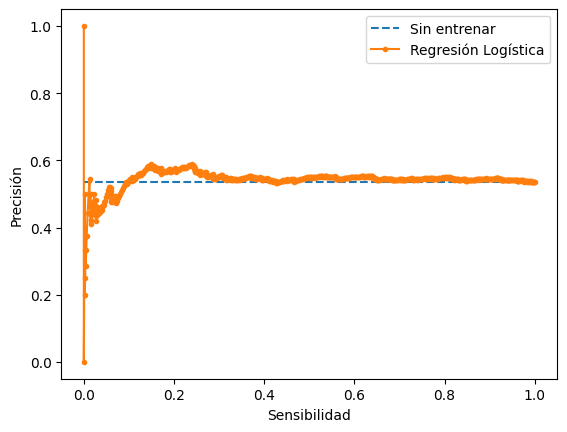

In [ ]:
# Importamos
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# Descargar los datos
y = df_wltw['accion']  # Columna de clasificación
X = df_wltw.drop(['accion', 'date', 'symbol'], axis=1)  # Resto de columnas
#Dividimos en training y test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
#Entrenamos
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predecimos probabilidades
lr_probs = model.predict_proba(testX)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 1]
# Sacamos los valores
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# Resumimos s
print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

ruta_archivo = '/content/eurusd_hour.csv'

# Carga el archivo CSV en un DataFrame
df_eur = pd.read_csv(ruta_archivo)
df_eur

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,00:00,1.28520,1.28520,1.28400,1.28440,-0.00080,1.28540,1.28540,1.28420,1.28460,-0.00080
1,2005-05-02,01:00,1.28440,1.28480,1.28390,1.28420,-0.00020,1.28460,1.28500,1.28410,1.28440,-0.00020
2,2005-05-02,02:00,1.28430,1.28540,1.28410,1.28510,0.00080,1.28450,1.28560,1.28430,1.28530,0.00080
3,2005-05-02,03:00,1.28510,1.28590,1.28500,1.28510,0.00000,1.28530,1.28610,1.28520,1.28530,0.00000
4,2005-05-02,04:00,1.28520,1.28590,1.28490,1.28550,0.00030,1.28540,1.28610,1.28510,1.28570,0.00030
...,...,...,...,...,...,...,...,...,...,...,...,...
93079,2020-04-29,18:00,1.08620,1.08851,1.08611,1.08713,0.00093,1.08660,1.08865,1.08640,1.08726,0.00066
93080,2020-04-29,19:00,1.08711,1.08823,1.08659,1.08748,0.00037,1.08725,1.08837,1.08675,1.08760,0.00035
93081,2020-04-29,20:00,1.08747,1.08788,1.08691,1.08708,-0.00039,1.08758,1.08810,1.08706,1.08808,0.00050
93082,2020-04-29,21:00,1.08708,1.08740,1.08699,1.08714,0.00006,1.08808,1.08814,1.08763,1.08766,-0.00042
